In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

%matplotlib ipympl

In [41]:
t_on = 10e-6
t_off = 2e-6
N_mu = 20
t_total = (t_on + t_off) * N_mu

sample_rate = 25e6


In [42]:
def voltage_sine(f, phase=0):
    return np.sin(2 * np.pi * f * np.arange(0, t_total, 1 / sample_rate) + phase) * np.sqrt(2)

In [43]:
def data_points(voltages):
    points = []
    for kk in range(N_mu):
        start = int(kk * (t_on + t_off) * sample_rate)
        end = int((kk * (t_on + t_off) + t_on) * sample_rate)
        points.append(np.average(voltages[start:end]))
    return np.array(points)

In [44]:
stds = []
fs = np.logspace(1, 7, 200)
for f in fs:
    std_f = []
    for p in np.linspace(0, 2 * np.pi, 100):
        std_f.append(np.std(data_points(voltage_sine(f, p))))
    stds.append(np.average(std_f))
stds = np.array(stds)

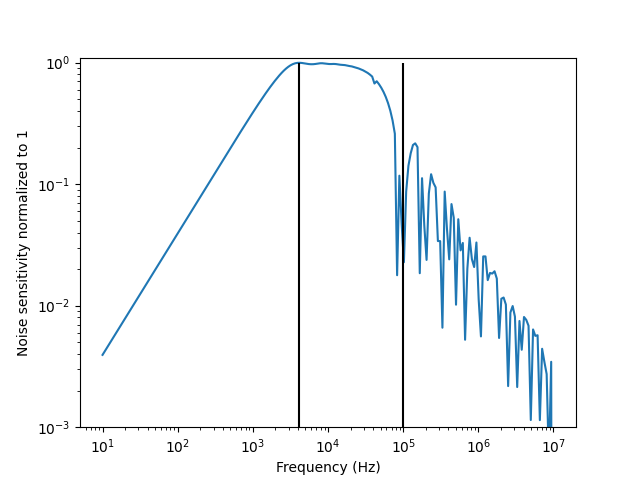

In [45]:
fig, ax = plt.subplots()
ax.plot(fs, stds)
unknown_factor = 1
ax.vlines([1 / t_on / unknown_factor, 1 / t_total / unknown_factor], 0, 1, color="k")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(1e-3, 1.1)
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Noise sensitivity normalized to 1")
plt.show()

In [22]:
scipy.integrate.quad(lambda f: np.std(data_points(voltage_sine(f))), 100, 1e7, limit=5000)

/tmp/ipykernel_137656/746003214.py:1: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  scipy.integrate.quad(lambda f: np.std(data_points(voltage_sine(f))), 100, 1e7, limit=5000)


(149517.80243068017, 424.6431718032924)